# Basic Testing

In this notebook we test that the main files work well.



# 1. Setup

In [1]:
# import numpy as np
# from agents import Agent
# from model import Model
# from tqdm import tqdm
# import networkx as nx
# import pandas as pd
# import random
# import matplotlib.pyplot as plt 

%load_ext autoreload
%autoreload 2   
from imports import *              
from agents import BetaAgent
from model import Model


# 2. First Test


In [2]:
n_agents = 100
my_network = G = nx.gnp_random_graph(n_agents, p=0.4, directed=True)
#nx.complete_graph(n_agents) #create_hybrid_network(20,degree=5,p_preferential_attachment=.01)#nx.erdos_renyi_graph(n_agents, 0.009)
my_model = Model(my_network, n_experiments=30, uncertainty=0.001,histories=True)
my_model.run_simulation(number_of_steps=10000,show_bar=True) #number_of_steps is a max amount
print('steps: ',my_model.n_steps)
df = pd.DataFrame(my_model.agent_histories)
df.info()
# mean_credences = df.mean()
# print(f'This is the history of mean credences of the agents, with agent type {agent_type}')
# mean_credences.plot(title='Mean Credences')

  3%|▎         | 273/10000 [00:07<04:30, 35.91it/s]


steps:  274
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 549 entries, 0 to 548
dtypes: object(549)
memory usage: 429.0+ KB


# Plots (TBU)

In [3]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,539,540,541,542,543,544,545,546,547,548
0,"[0.5, 0.5]","[0.5104895104895105, 0.5]","[0.5104895104895105, 0.49683544303797467]","[0.5171102661596958, 0.49683544303797467]","[0.5171102661596958, 0.488905325443787]","[0.5068710359408034, 0.488905325443787]","[0.5068710359408034, 0.4848130841121495]","[0.5069546120058566, 0.4848130841121495]","[0.5069546120058566, 0.49131274131274133]","[0.5047196002220988, 0.49131274131274133]",...,"[0.5011537635111779, 0.4992424380715942]","[0.5011537635111779, 0.49915394552500864]","[0.5013165730023447, 0.49915394552500864]","[0.5013165730023447, 0.4991201973660342]","[0.5012367867631391, 0.4991201973660342]","[0.5012367867631391, 0.498995675069217]","[0.5013514012139549, 0.498995675069217]","[0.5013514012139549, 0.4990252003754784]","[0.5012767403624473, 0.4990252003754784]","[0.5012767403624473, 0.49900055824674505]"
1,"[0.5, 0.5]","[0.5049833887043189, 0.5]","[0.5049833887043189, 0.5207756232686981]","[0.4973021582733813, 0.5207756232686981]","[0.4973021582733813, 0.5039164490861618]","[0.4921956295525494, 0.5039164490861618]","[0.4921956295525494, 0.49951028403525954]","[0.4829755736491488, 0.49951028403525954]","[0.4829755736491488, 0.4930286599535244]","[0.4955207166853303, 0.4930286599535244]",...,"[0.5004136248891314, 0.49750744476069825]","[0.5004136248891314, 0.4974403570373773]","[0.5004118336361938, 0.4974403570373773]","[0.5004118336361938, 0.49728296451486187]","[0.5003973756298826, 0.49728296451486187]","[0.5003973756298826, 0.4973386017046011]","[0.5003577410964554, 0.4973386017046011]","[0.5003577410964554, 0.49728743422231636]","[0.5004189674965016, 0.49728743422231636]","[0.5004189674965016, 0.49726833710020973]"
2,"[0.5, 0.5]","[0.5284810126582279, 0.5]","[0.5284810126582279, 0.5147783251231527]","[0.5122591943957968, 0.5147783251231527]","[0.5122591943957968, 0.505166475315729]","[0.5010405827263268, 0.505166475315729]","[0.5010405827263268, 0.5]","[0.4911410347271439, 0.5]","[0.4911410347271439, 0.5013596193065941]","[0.5002623294858342, 0.5013596193065941]",...,"[0.5008630920271874, 0.49998448554052377]","[0.5008630920271874, 0.4999458506095674]","[0.5008940493914324, 0.4999458506095674]","[0.5008940493914324, 0.4998148605282646]","[0.5009513911707842, 0.4998148605282646]","[0.5009513911707842, 0.4997153013957926]","[0.5009968344798198, 0.4997153013957926]","[0.5009968344798198, 0.4996699720627514]","[0.5010302952250362, 0.4996699720627514]","[0.5010302952250362, 0.4996783137513212]"


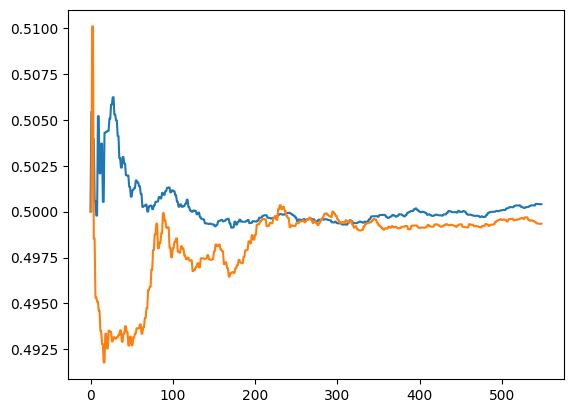

In [4]:
# Extract the first coordinate (x) for each pair and calculate column-wise mean
x_means = df.applymap(lambda pair: pair[0]).mean()
y_means = df.applymap(lambda pair: pair[1]).mean()
plt.plot(x_means)
plt.plot(y_means)

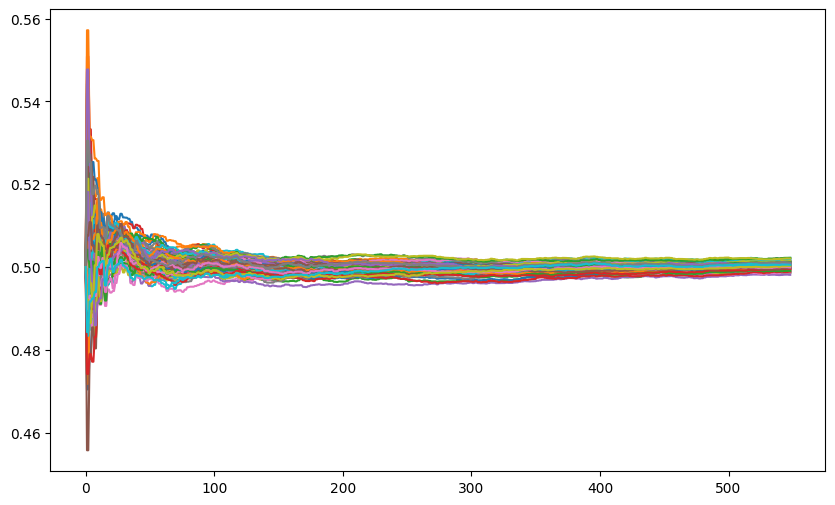

In [5]:
# Extract the first coordinate (x) for each pair
x_values = df.applymap(lambda pair: pair[0])

# Plot the first coordinate for each row
plt.figure(figsize=(10, 6))
for row_idx in range(x_values.shape[0]):
    plt.plot(x_values.columns, x_values.iloc[row_idx, :], label=f'Row {row_idx+1}' if row_idx < 5 else None)


# 3. Simulations with simple networks

(Here we replicate the wheel, cycle, complete setup)

## First we define the simulation function and run it

In [6]:
def create_graph(keyword, n_agents):
    if keyword == "complete":
        return nx.complete_graph(n_agents)
    elif keyword == "wheel":
        return nx.wheel_graph(n_agents)
    elif keyword == "cycle":
        return nx.cycle_graph(n_agents)
    else:
        raise ValueError("Invalid keyword. Please choose 'complete', 'wheel', or 'cycle'.")

def generate_parameters(n):
    params_list = []
    for _ in range(n):
        n_agents = random.randint(3, 20)
        network_keyword = random.choice(["complete", "wheel", "cycle"])
        network = create_graph(network_keyword, n_agents)
        uncertainty = 0.01
        n_experiments = random.randint(1, 1000)
        params = {
            "n_agents": n_agents,
            "network_type" : network_keyword,
            "network": network,
            "uncertainty": uncertainty,
            "n_experiments": n_experiments
        }
        params_list.append(params)
    return params_list

# Example usage:
# Generate a list of 5 parameter dictionaries
# parameter_dictionaries = generate_parameters(50)


In [7]:
import numbers
def run_simulation_with_params(param_dict, number_of_steps=1000, show_bar=False,agent_type="beta"):
    # Extract the network directly since it's already a NetworkX graph object
    my_network = param_dict['network']
    # Other parameters are directly extracted from the dictionary
    my_model = Model(my_network, n_experiments=param_dict['n_experiments'], uncertainty=param_dict['uncertainty']
                    , agent_type=agent_type)
    # Run the simulation with predefined steps and show_bar option
    
    my_model.run_simulation(number_of_steps=number_of_steps, show_bar=show_bar)
  
    

    result_dict = {
        key: value 
        for key, value in param_dict.items() 
        if isinstance(value, (numbers.Number, str, tuple, list))}   
    result_dict['true_consensus'] = my_model.conclusion
    result_dict['true_consensus_alternative_stop'] = my_model.conclusion_alternative_stop
    #df = pd.DataFrame(my_model.agents_choices) 
    #result_dict['choice_consensus'] = df.mean()[len(df.mean())-1]
    result_dict['convergence_step'] = my_model.n_steps # takes note of the last reported step
    result_dict['agent_type']=agent_type
    
    return result_dict


parameter_dictionaries = generate_parameters(1000)  # Generate one for demonstration
result = run_simulation_with_params(parameter_dictionaries[1], number_of_steps=200, show_bar=False)
#print(result['choice_consensus'])
print(result['convergence_step'])


200


In [8]:
# Ensure your run_simulation_with_params function and others are defined

def run_simulations(param_list, number_of_steps=200, show_bar=False,agent_type="beta"):
    def run_simulation(param_dict):
        return run_simulation_with_params(param_dict, number_of_steps=number_of_steps, show_bar=show_bar,agent_type=agent_type)
    
    results = []
    # Iterate over each parameter dictionary in the list
    for params in tqdm.tqdm(param_list, desc="Running simulations"):
        result = run_simulation(params)
        results.append(result)
    
    # Convert the list of results into a Pandas DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Example usage
parameter_dictionaries = generate_parameters(100)  # Generate parameter dictionaries
results_df = run_simulations(parameter_dictionaries, number_of_steps=200, show_bar=False)
print(results_df)


Running simulations: 100%|██████████| 100/100 [00:30<00:00,  3.26it/s]

    n_agents network_type  uncertainty  n_experiments  true_consensus  \
0          8        wheel         0.01            761             1.0   
1          4     complete         0.01            995             1.0   
2         14        wheel         0.01            904             1.0   
3         17     complete         0.01            556             1.0   
4         15        wheel         0.01            624             1.0   
..       ...          ...          ...            ...             ...   
95        12        wheel         0.01            242             1.0   
96        20        wheel         0.01            638             1.0   
97        13        cycle         0.01            991             1.0   
98        14        cycle         0.01            805             1.0   
99        10     complete         0.01            794             1.0   

   true_consensus_alternative_stop  convergence_step agent_type  
0                            False               200     

In [9]:
# The difference between true consensus and choice consensus is that it happens to be the case that for the parameters explored
# if there is no true consensus at the end, then i think they should have different values
# maybe Im wrong
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   n_agents                         100 non-null    int64  
 1   network_type                     100 non-null    object 
 2   uncertainty                      100 non-null    float64
 3   n_experiments                    100 non-null    int64  
 4   true_consensus                   100 non-null    float64
 5   true_consensus_alternative_stop  100 non-null    object 
 6   convergence_step                 100 non-null    int64  
 7   agent_type                       100 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 6.4+ KB


## Now Some Standard Plotting

In [10]:
def plot_big_results(results_df=results_df,variable_of_interest = 'true_consensus'):
    grouped = results_df.groupby(['network_type', 'n_agents'])[variable_of_interest].mean().reset_index()

    # Preparing for the line plot
    #grouped['mid_bin'] = grouped['binned'].apply(lambda x: x.mid).astype(float)  # Getting the midpoint of bins for plotting

    # Plotting
    plt.figure(figsize=(12, 8))

    for network_type in results_df['network_type'].unique():
        subset = grouped[grouped['network_type'] == network_type]
        plt.plot(subset['n_agents'], subset[variable_of_interest], marker='o', label=network_type)

    plt.xlabel('Number of Agents')
    plt.ylabel('Share of '+variable_of_interest)
    plt.title('Share of '+ variable_of_interest +' by Number of Agents and Network Type')
    plt.title(network_type)

    plt.grid(True)
    plt.show()

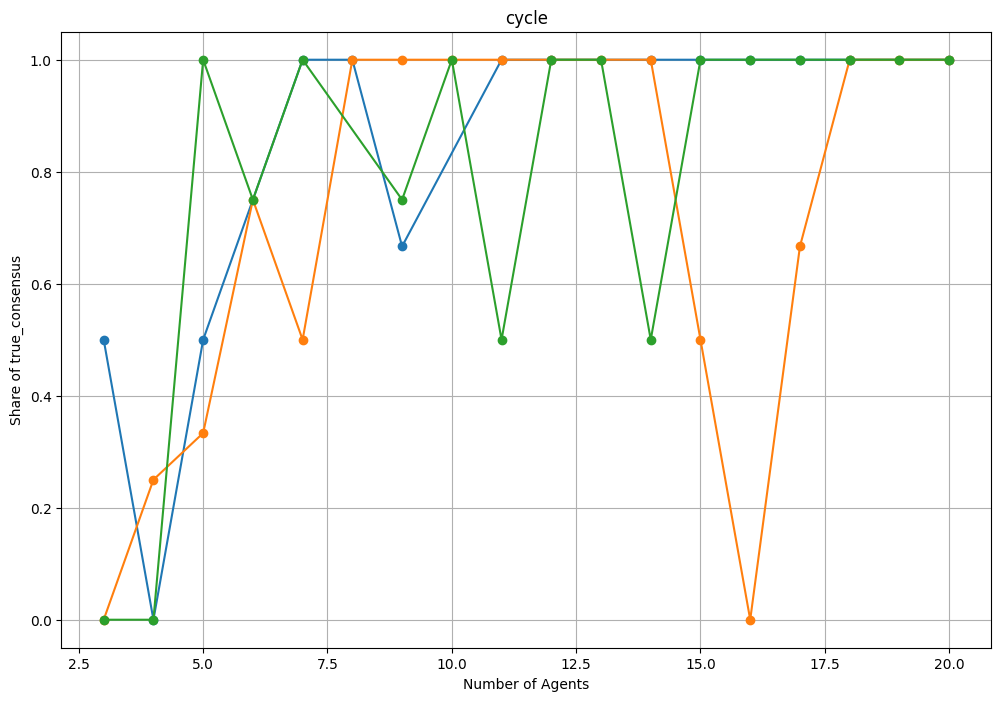

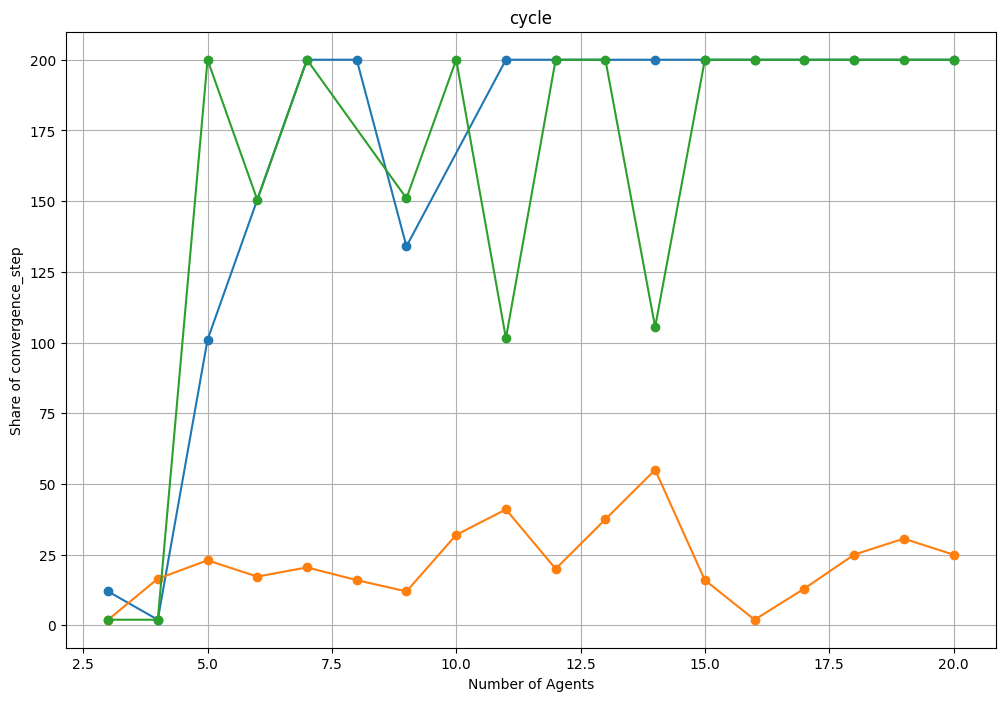

In [11]:
plot_big_results(variable_of_interest = 'true_consensus')
#plot_big_results(variable_of_interest = 'choice_consensus')
plot_big_results(variable_of_interest = 'convergence_step')